In [88]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import PolynomialFeatures
import math

In [89]:
# Create noisy data
# x_data = np.linspace(-10, 10, num=1000)

stimulusResponsePairCount = 50

x = np.random.randint(100, size=(stimulusResponsePairCount))

y = []
for i in range(stimulusResponsePairCount):
  y.append(i)
y = np.asarray(y)


x_orig = x
x = minmax_scale(x, feature_range=(0,1))
y = minmax_scale(y, feature_range=(0,1))

n = 10

roots = np.random.uniform(-1, 1, n)
polyCoef = np.poly(roots)

y = np.polyval(polyCoef, x)



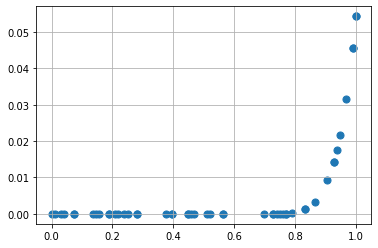

In [90]:
# Display the dataset
plt.scatter(x, y, s=50)
plt.grid()
plt.show()

In [91]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 16, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer='adam')

# Display the model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_48 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_49 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 17        
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(x, y, epochs=3000, verbose=1, batch_size=1000)

=============] - 0s 2ms/step - loss: 2.4534e-05
Epoch 2769/3000
1/1 [==============================] - 0s 3ms/step - loss: 2.3730e-05
Epoch 2770/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7179e-05
Epoch 2771/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.6341e-05
Epoch 2772/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.5599e-05
Epoch 2773/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.3964e-05
Epoch 2774/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.4495e-05
Epoch 2775/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.6979e-05
Epoch 2776/3000
1/1 [==============================] - 0s 4ms/step - loss: 2.5410e-05
Epoch 2777/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.5497e-05
Epoch 2778/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.0532e-05
Epoch 2779/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.0062e-05
Epoch 

[42.78350515 34.02061856 44.84536082 36.59793814 36.08247423  3.60824742
 45.87628866 29.3814433  26.28865979 47.42268041 17.01030928 21.13402062
  5.67010309  6.70103093 38.1443299  10.30927835 13.91752577 17.5257732
 47.93814433 23.71134021 28.86597938 20.6185567   0.         40.72164948
 37.11340206 34.53608247 17.5257732  11.8556701  50.         31.95876289
 41.2371134   9.27835052  7.73195876 37.62886598  8.7628866  17.5257732
 22.16494845 22.16494845 48.45360825 28.86597938 48.45360825 14.43298969
 33.50515464 11.34020619 35.05154639 26.28865979 50.         14.43298969
  0.51546392 25.25773196]


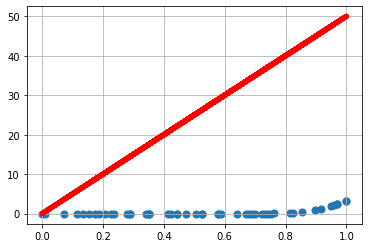

In [87]:
# Compute the output 
y_predicted = model.predict(x)

y_predicted = minmax_scale(x, feature_range=(0,50))
print(y_predicted)

# Display the result
plt.scatter(x, y, s=50)
plt.plot(x_orig, y_predicted, 'r', linewidth=5)
plt.grid()
plt.show()